# ingredient_vision

> Exploring computer vision for vegan ingredient inferencing.

TODOS

* Figure out open raw
* Eval on 3 good sample images
* Create UI for photo select
* Add to Gradio APP

In [ ]:
#| default_exp engineer_prompt

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from pathlib import Path

import constants
from PIL import Image
from transformers import (
    BlipForConditionalGeneration,
    BlipForQuestionAnswering,
    BlipProcessor,
    pipeline,
)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

Inspiration drawn from [TaskMartix aka Visual ChatGPT](https://github.com/microsoft/TaskMatrix)

In [ ]:
#| export
class BlipImageCaptioning:
    """
    Useful when you want to know what is inside the photo.
    """

    def __init__(self, device: str):
        self.device = device
        self.torch_dtype = torch.float16 if "cuda" in device else torch.float32
        self.processor = BlipProcessor.from_pretrained(
            "Salesforce/blip-image-captioning-base"
        )
        self.model = BlipForConditionalGeneration.from_pretrained(
            "Salesforce/blip-image-captioning-base", torch_dtype=self.torch_dtype
        ).to(self.device)

    def inference(self, image: Image):
        inputs = self.processor(image, return_tensors="pt").to(
            self.device, self.torch_dtype
        )
        out = self.model.generate(**inputs)
        captions = self.processor.decode(out[0], skip_special_tokens=True)
        return captions

In [ ]:
#| export
class BlipVQA:
    """
                                BLIP Visual Question Answering
                                Useful when you need an answer for a question based on an image.
                                Examples:
        what is the background color of this image, how many cats are in this figure, what is in this figure?
    """

    def __init__(self, device: str):
        self.torch_dtype = torch.float16 if "cuda" in device else torch.float32
        self.device = device
        self.processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
        self.model = BlipForQuestionAnswering.from_pretrained(
            "Salesforce/blip-vqa-base", torch_dtype=self.torch_dtype
        ).to(self.device)

    def inference(self, image: Image, question: str):
        inputs = self.processor(image, question, return_tensors="pt").to(
            self.device, self.torch_dtype
        )
        out = self.model.generate(**inputs)
        answer = self.processor.decode(out[0], skip_special_tokens=True)
        return answer

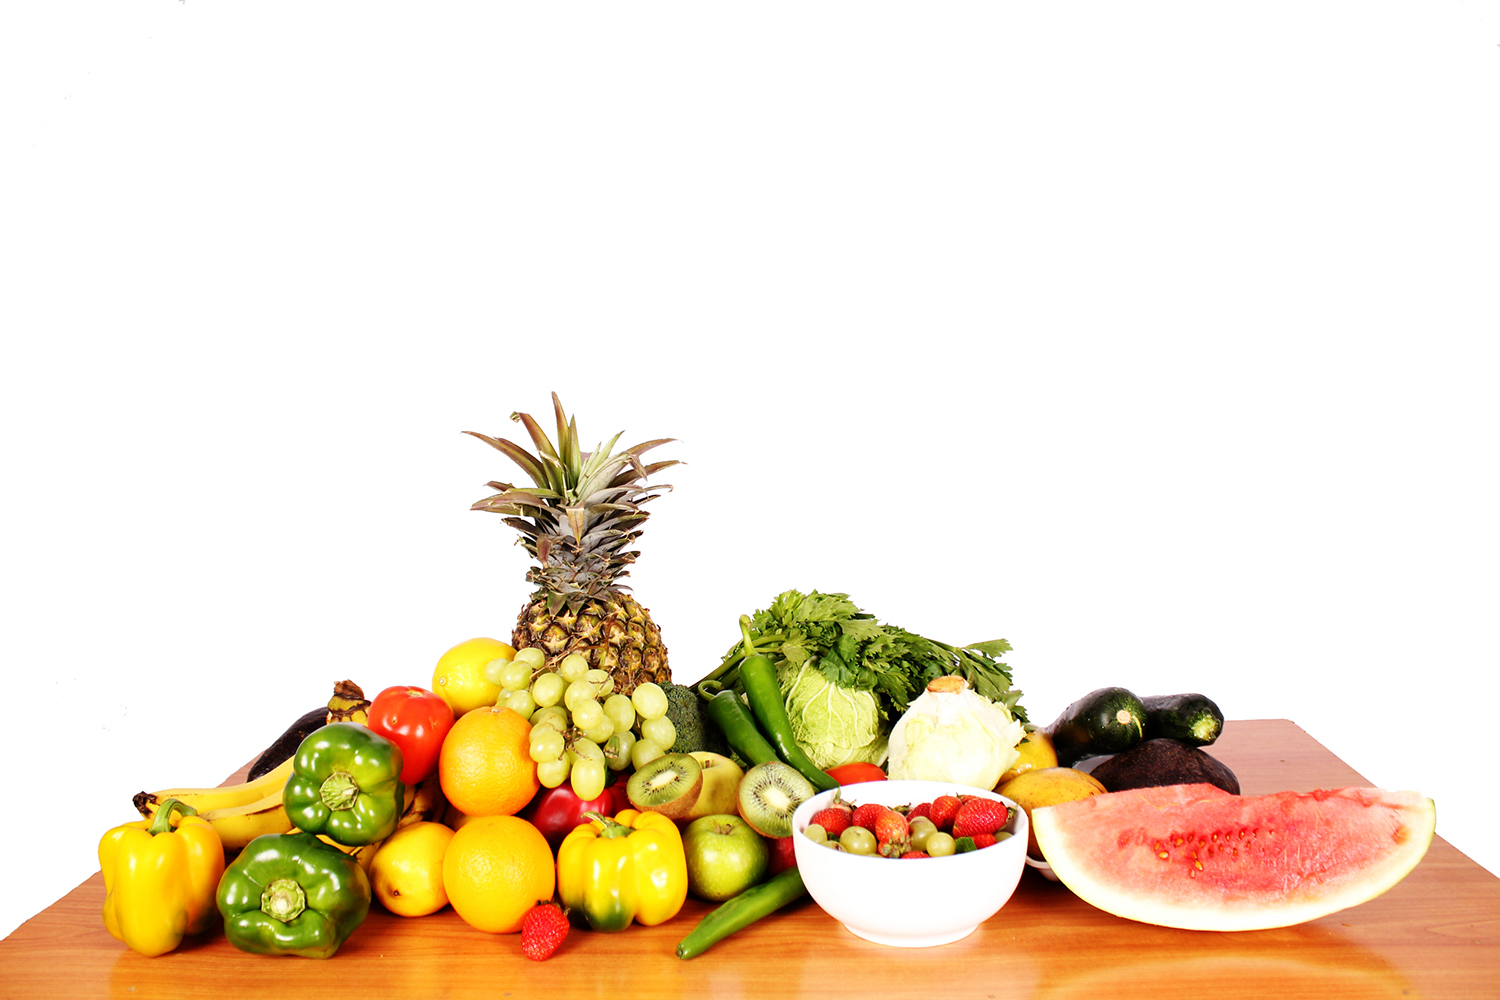

In [ ]:
SAMPLE_IMG_DIR = Path(f"{constants.ROOT_DIR}/assets/images/vegan_ingredients")
Image.open(SAMPLE_IMG_DIR / "Fruits-and-vegetables-one-a-table.jpg")

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()